# Bibliotecas Usadas

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dados Básicos do Dataset

In [2]:
df = pd.read_csv("ncr_ride_bookings.csv")

In [3]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

## EDA

Análise do tipos de veículos

In [5]:
df['Vehicle Type'].unique()

array(['eBike', 'Go Sedan', 'Auto', 'Premier Sedan', 'Bike', 'Go Mini',
       'Uber XL'], dtype=object)

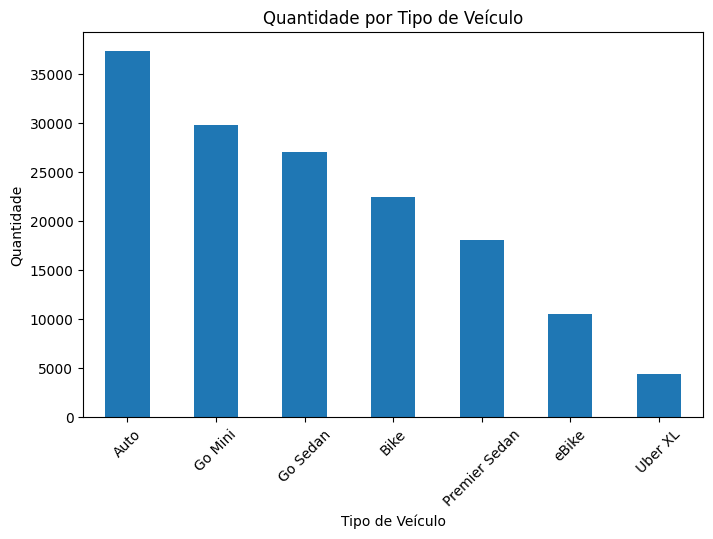

In [7]:
# Contagem por categoria
counts = df['Vehicle Type'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8,5))
counts.plot(kind='bar')

plt.title("Quantidade por Tipo de Veículo")
plt.xlabel("Tipo de Veículo")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()

Motivos para as corridas não terem sido completadas

In [8]:
df['Incomplete Rides Reason'].unique()

array([nan, 'Vehicle Breakdown', 'Other Issue', 'Customer Demand'],
      dtype=object)

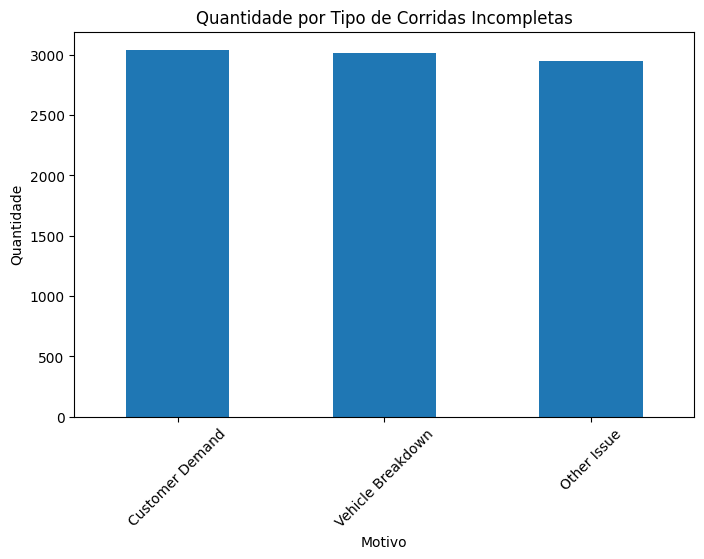

In [9]:
# Contagem por categoria
counts = df['Incomplete Rides Reason'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8,5))
counts.plot(kind='bar')

plt.title("Quantidade por Tipo de Corridas Incompletas")
plt.xlabel("Motivo")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()

Análise para o motorista ter cancelado a corrida

In [10]:
df['Driver Cancellation Reason'].unique()

array([nan, 'Personal & Car related issues', 'Customer related issue',
       'More than permitted people in there',
       'The customer was coughing/sick'], dtype=object)

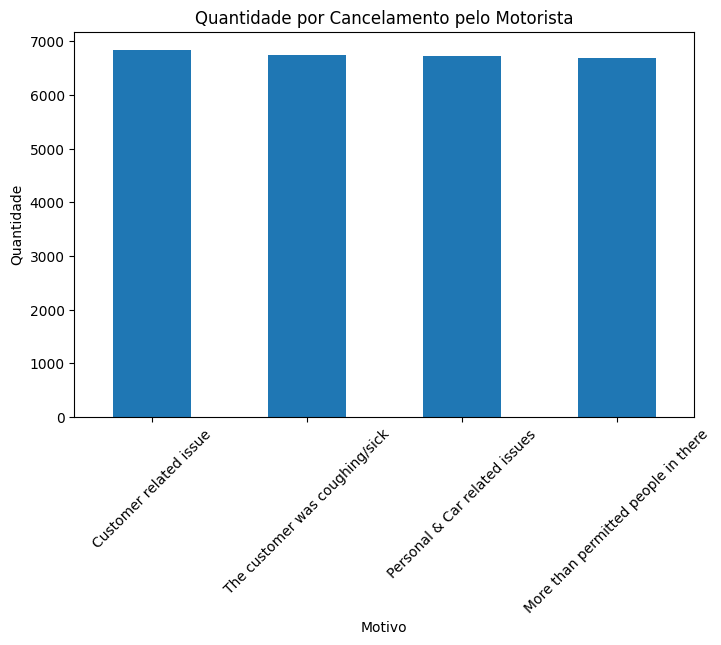

In [10]:
# Contagem por categoria
counts = df['Driver Cancellation Reason'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8,5))
counts.plot(kind='bar')

plt.title("Quantidade por Cancelamento pelo Motorista")
plt.xlabel("Motivo")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna('Reason Unkown')
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna('Reason Unkown')
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna('Reason Unkown')
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0)   
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'].fillna(0)
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0)

In [ ]:
df['Avg VTAT'].fillna(df['Avg VTAT'].mean(), inplace=True)
df['Avg CTAT'].fillna(df['Avg CTAT'].mean(), inplace=True)
df['Booking Value'].fillna(df['Booking Value'].mean(), inplace=True)
df['Ride Distance'].fillna(df['Ride Distance'].mean(), inplace=True)
df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)

/tmp/ipykernel_9998/3666437257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg VTAT'].fillna(df['Avg VTAT'].mean(), inplace=True)
/tmp/ipykernel_9998/3666437257.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

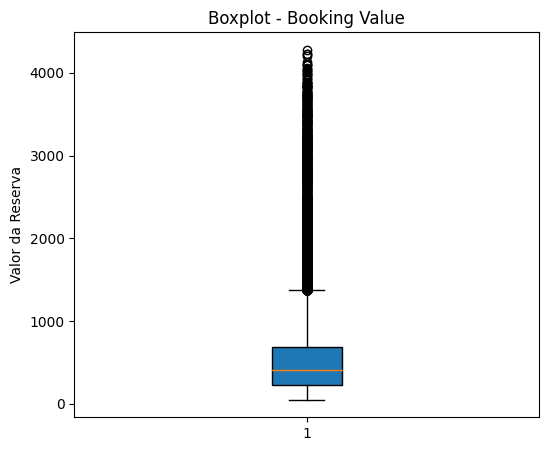

In [14]:
data = df['Booking Value'].dropna()

plt.figure(figsize=(6,5))
plt.boxplot(data, vert=True, patch_artist=True)

plt.title("Boxplot - Booking Value")
plt.ylabel("Valor da Reserva")
plt.show()

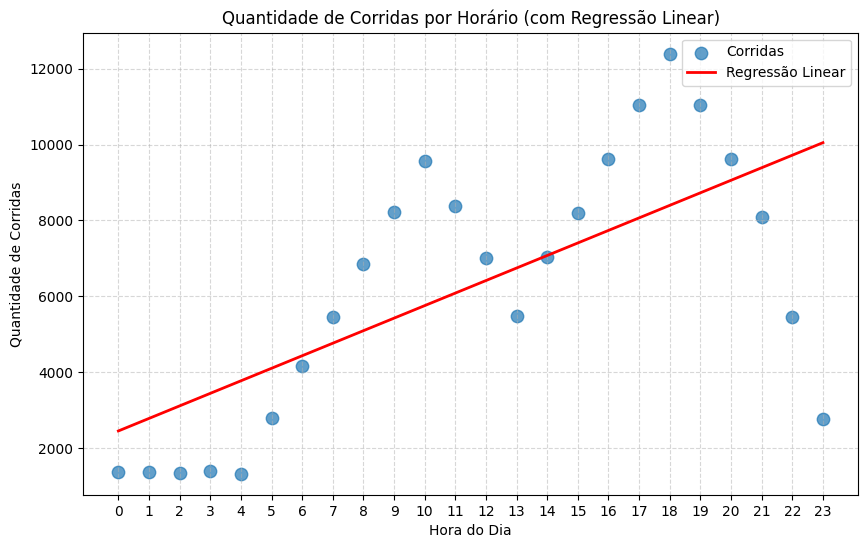

In [18]:
# Converter coluna Time para datetime (caso ainda não esteja)
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Extrair apenas a hora
df['Hour'] = df['Time'].dt.hour

# Contagem de corridas por hora
rides_per_hour = df['Hour'].value_counts().sort_index()

# Preparar dados
X = rides_per_hour.index.to_numpy()   # horas como array
y = rides_per_hour.values             # quantidade de corridas

# Ajustar regressão linear simples
coef = np.polyfit(X, y, 1)  
poly1d_fn = np.poly1d(coef)

# Gráfico
plt.figure(figsize=(10,6))
plt.scatter(X, y, s=80, alpha=0.7, label="Corridas")
plt.plot(X, poly1d_fn(X), color="red", linewidth=2, label="Regressão Linear")

plt.title("Quantidade de Corridas por Horário (com Regressão Linear)")
plt.xlabel("Hora do Dia")
plt.ylabel("Quantidade de Corridas")
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

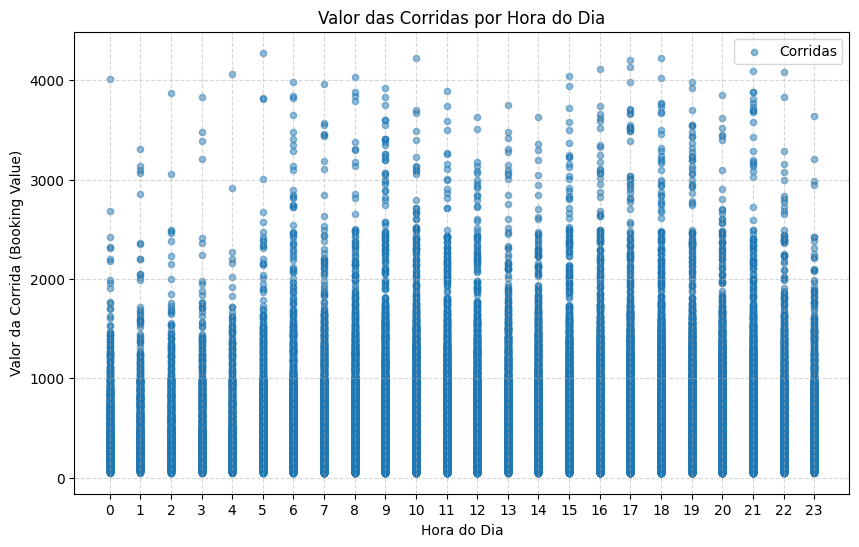

In [19]:
# Garantir que Time está como datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Extrair apenas a hora
df['Hour'] = df['Time'].dt.hour

# Remover valores nulos em Booking Value e Hour
data = df[['Hour', 'Booking Value']].dropna()

X = data['Hour'].to_numpy()
y = data['Booking Value'].to_numpy()

# Gráfico de dispersão
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.5, s=20, label="Corridas")

plt.title("Valor das Corridas por Hora do Dia")
plt.xlabel("Hora do Dia")
plt.ylabel("Valor da Corrida (Booking Value)")
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

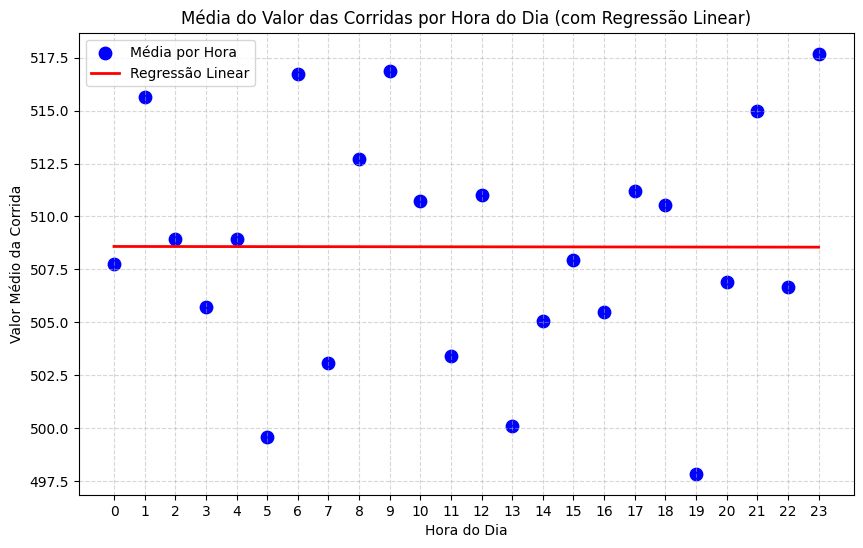

In [21]:
# Garantir que Time está como datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Extrair a hora
df['Hour'] = df['Time'].dt.hour

# Calcular a média do Booking Value por hora
mean_values = df.groupby('Hour')['Booking Value'].mean()

# Preparar dados
X = mean_values.index.to_numpy()
y = mean_values.values

# Ajustar regressão linear
coef = np.polyfit(X, y, 1)   # grau 1 -> linha
poly1d_fn = np.poly1d(coef)

# Gráfico
plt.figure(figsize=(10,6))
plt.scatter(X, y, s=80, color="blue", label="Média por Hora")
plt.plot(X, poly1d_fn(X), color="red", linewidth=2, label="Regressão Linear")

plt.title("Média do Valor das Corridas por Hora do Dia (com Regressão Linear)")
plt.xlabel("Hora do Dia")
plt.ylabel("Valor Médio da Corrida")
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
df.to_csv('process_data.csv', index=False)